### Red Wine Quality Prediction

In [1]:
#imporing required libraries

import pandas as pd
import numpy as np

#Visual library
import matplotlib.pyplot as plt
import seaborn as sns

#import warning library to suppress the exception
import warnings
warnings.filterwarnings('ignore')

#Scipy lib (mathematical calculation)
from scipy.stats import zscore
from scipy.stats import boxcox

#Model selection Lib
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df =pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

##### Attribute Information

    Input variables (based on physicochemical tests):
    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    Output variable (based on sensory data):
    12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

##### Initial Observation to select model

    -  Dataset is having independent value (input) and depedent variable (target/label).So this is
       Supervised learning
    -  Input and output value is representing this is classification alrithem

Intial EDA process will carriying out to apply the ML model in the data

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
#Checking null value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

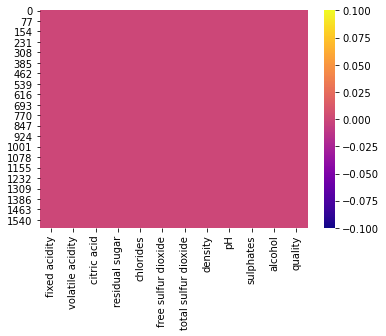

In [7]:
# Visual representation
sns.heatmap(df.isnull(),cmap='plasma')

In [8]:
# Summary Statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Observation : 
    1. Data distribution : SD is high (free sulfur dioxide,total sulfur dioxide)
    2. Skewness (abnormal distribution) : (	fixed acidity,residual sugar,total sulfur dioxide)
    3. Outlier (75% and Max value) : (fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates)

In [9]:
#Checking the skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [10]:
df['residual sugar'] =boxcox(df['residual sugar'],0)

In [11]:
df['chlorides'] =boxcox(df['chlorides'],0)

In [12]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [13]:
#distibution Plot

<AxesSubplot:xlabel='residual sugar'>

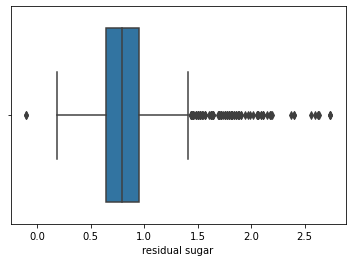

In [14]:
sns.boxplot(df['residual sugar'])

fixed acidity              AxesSubplot(0.125,0.536818;0.0824468x0.343182)
volatile acidity        AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
citric acid             AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
residual sugar          AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
chlorides               AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
free sulfur dioxide     AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
total sulfur dioxide    AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
density                 AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
pH                            AxesSubplot(0.125,0.125;0.0824468x0.343182)
sulphates                  AxesSubplot(0.223936,0.125;0.0824468x0.343182)
alcohol                    AxesSubplot(0.322872,0.125;0.0824468x0.343182)
quality                    AxesSubplot(0.421809,0.125;0.0824468x0.343182)
dtype: object

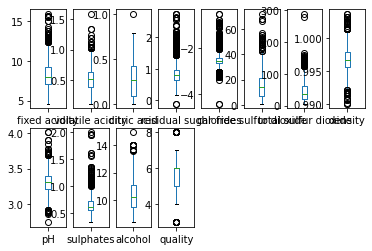

In [15]:
#Checking outlier by ploting the diagram
df.plot(kind='box',subplots=True,layout=(2,8))

In [16]:
# Checking correlation inbetween data
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.174742,0.175191,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.024278,0.108726,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.172286,0.181780,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.174742,0.024278,0.172286,1.000000,0.117102,0.150696,0.197799,0.417538,-0.091241,0.010586,0.080569,0.023533
chlorides,0.175191,0.108726,0.181780,0.117102,1.000000,-0.002195,0.058376,0.351939,-0.283629,0.278909,-0.303961,-0.176140
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.150696,-0.002195,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.197799,0.058376,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.417538,0.351939,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.091241,-0.283629,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.010586,0.278909,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

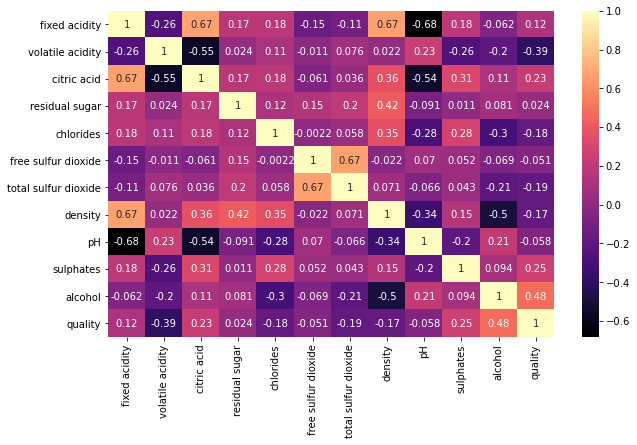

In [17]:
# Plotting the corelation of data
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='magma',annot=True)

In [18]:
#Removing outlier
#using scipy library find z score value
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [19]:
new_df =df[(z<3).all(axis=1)]

In [20]:
new_df.shape

(1448, 12)

<AxesSubplot:xlabel='residual sugar'>

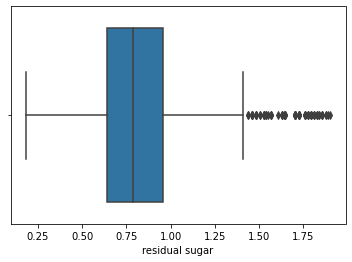

In [21]:
sns.boxplot(new_df['residual sugar'])

In [22]:
df.shape

(1599, 12)

In [23]:
#Checking outlier by ploting the diagram


In [24]:
# Data Loss
data_loss = (1599-1448)/1599*100
data_loss

9.443402126328955

In [25]:
#Creating Dataset
x =new_df.iloc[:,0:-1]
x.shape

(1448, 11)

In [26]:
y=new_df['quality']
y.shape

(1448,)

In [27]:
# Spliting training and testing data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.22,random_state=40)

In [28]:
# The shape of dataset
print("X Train",x_train.shape)
print("Y Train",y_train.shape)
print("X Test",x_test.shape)
print("Y Test",y_test.shape)

X Train (1129, 11)
Y Train (1129,)
X Test (319, 11)
Y Test (319,)


In [29]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
dst = DecisionTreeClassifier()
#mnb = MultinomialNB()
svc = SVC()
knn = KNeighborsClassifier()

model = [dst,svc,knn]

def performance(actual,predicted):
    print("Accuracy Value",accuracy_score(actual,predicted))
    print("_"*50)
    print("Confusion Matix",confusion_matrix(actual,predicted))
    print("_"*50)
    print("Classification Report",classification_report(actual,predicted))

In [31]:
# for loop to execute all models

for m in model:
    training_model = m.fit(x_train,y_train)
    prec_y = training_model.predict(x_test)
    print(type(m))
    performance(y_test,prec_y)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy Value 0.6551724137931034
__________________________________________________
Confusion Matix [[ 2  6  1  1  0]
 [ 3 91 25  3  0]
 [ 7 29 91 17  0]
 [ 0  4 11 24  2]
 [ 0  0  0  1  1]]
__________________________________________________
Classification Report               precision    recall  f1-score   support

           4       0.17      0.20      0.18        10
           5       0.70      0.75      0.72       122
           6       0.71      0.63      0.67       144
           7       0.52      0.59      0.55        41
           8       0.33      0.50      0.40         2

    accuracy                           0.66       319
   macro avg       0.49      0.53      0.50       319
weighted avg       0.66      0.66      0.66       319

<class 'sklearn.svm._classes.SVC'>
Accuracy Value 0.4952978056426332
__________________________________________________
Confusion Matix [[ 0  3  7  0  0]
 [ 0 63 59  0  0]
 [ 0 49 95  0  0]
 

NameError: name 'svm' is not defined